# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

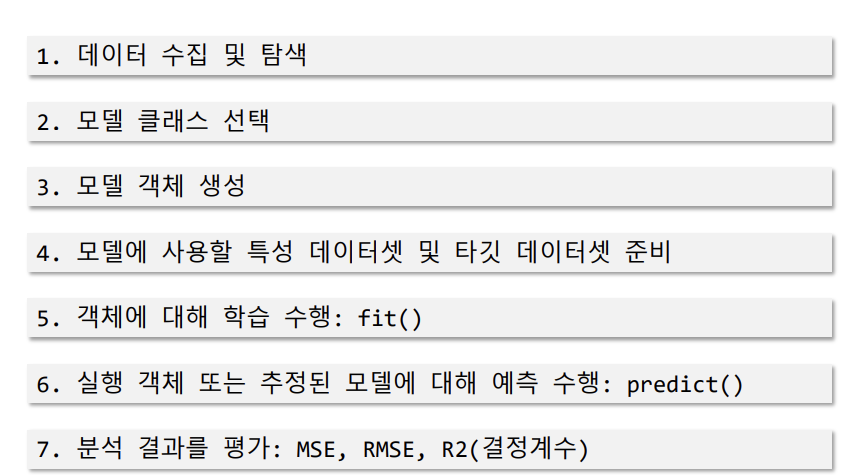

### 필요한 모듈 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [2]:
beer = pd.read_csv("C:/Users/Administrator/Desktop/회귀분석/data/beer.csv")
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


### 데이터 탐색

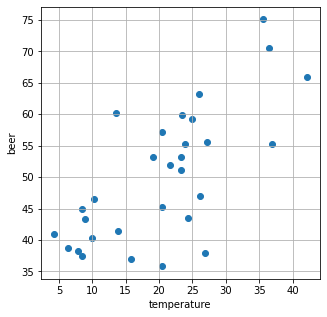

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'],beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [4]:
# 독립 변수, 종속 변수 확인
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [5]:
# 종속 변수 확인, 레코드 수 확인
print(beer['beer'])
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [7]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리


#독립변수, 종속변수 데이터셋 준비
X = np.array(beer['temperature']).reshape(-1,1) #2차원 array로 바꿈 because 2차원 데이터만 모델링 가능
y = beer['beer']
X

array([[20.5],
       [25. ],
       [10. ],
       [26.9],
       [15.8],
       [ 4.2],
       [13.5],
       [26. ],
       [23.3],
       [ 8.5],
       [26.2],
       [19.1],
       [24.3],
       [23.3],
       [ 8.4],
       [23.5],
       [13.9],
       [35.5],
       [27.2],
       [20.5],
       [10.2],
       [20.5],
       [21.6],
       [ 7.9],
       [42.2],
       [23.9],
       [36.9],
       [ 8.9],
       [36.4],
       [ 6.4]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

### 모델 구축

In [9]:
from sklearn.linear_model import LinearRegression
#모델 클래스 선택 후 인스턴스 객체 생성
lr = LinearRegression()


In [10]:
# 학습 수행
reg=lr.fit(X_train,y_train)

In [11]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_   #parameter or model parameter

(array([0.69705648]), 36.06666541566105)

In [12]:
#회귀식
#coeffient 값이 array 형식이기 때문에 reg.coef_[0]으로 해준다
print("y={:2f}X + {:3f}".format(reg.coef_[0], reg.intercept_))

y=0.697056X + 36.066665


In [13]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2))

[60.81 50.36 54.33 50.36 41.92 43.18]


### 모델 성능 평가

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
#MSE
mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)

print("MSE:", np.round(mse,3))
print("RMSE:", np.round(rmse,3))

MSE: 91.347
RMSE: 9.558


In [15]:
#결정계수 R2
r2_score(y_test, y_pred)

print(reg.score(X_test, y_test))

0.4845648129795149


### 시각화

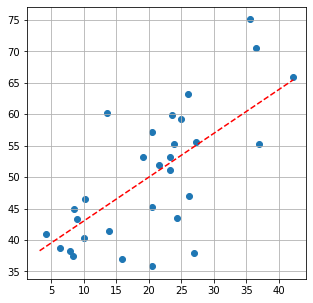

In [17]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize =(5,5))
xx = np.arange(beer['temperature'].min()-1, beer['temperature'].max() +1)
yy = reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy, linestyle = '--', color='red')

# 수집한 데이터셋 시각화
#직선은 plot, 점은 scatter
plt.scatter(beer['temperature'],beer['beer'])
plt.grid()
plt.show()

In [19]:
yy

array([38.29724615, 38.99430263, 39.69135911, 40.38841559, 41.08547207,
       41.78252855, 42.47958503, 43.17664151, 43.87369799, 44.57075447,
       45.26781095, 45.96486743, 46.66192391, 47.35898039, 48.05603687,
       48.75309335, 49.45014983, 50.14720631, 50.84426279, 51.54131927,
       52.23837575, 52.93543223, 53.63248871, 54.32954519, 55.02660167,
       55.72365815, 56.42071463, 57.11777111, 57.81482759, 58.51188407,
       59.20894055, 59.90599703, 60.60305351, 61.30010999, 61.99716647,
       62.69422295, 63.39127943, 64.08833591, 64.78539239, 65.48244887])

# 응용1. 나이, 키의 관계를 회귀 분석

In [ ]:
# 필요한 모듈 import 


#### 데이터 생성/수집

In [50]:
data_df = pd.read_csv("./data/age_height.csv" )
data_df.head()

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589


#### 데이터 탐색

In [ ]:
# 데이터 분포 시각화

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [39]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X = np.array(data_df['age(X)']).reshape(-1,1)
y = data_df['height(T)']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [40]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression

#모델 객체 생성  및 학습
lr = LinearRegression()
reg = lr.fit(X_train, y_train)

In [42]:
# 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2))

[156.85 177.56 158.41 145.98]


In [49]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용


# MSE
mse = mean_squared_error(y_test,y_pred)
print(mse)
#RMSE
rmse = np.sqrt(mse)
print(rmse)
#결정계수 R2
print(r2_score(y_test, y_pred))
#회귀식
reg.coef_, reg.intercept_
print('y= ',reg.coef_,'x + ',reg.intercept_)

83.49484660286443
9.137551455552217
0.6627884107222466
y=  [1.43863478] x +  138.78419382830361


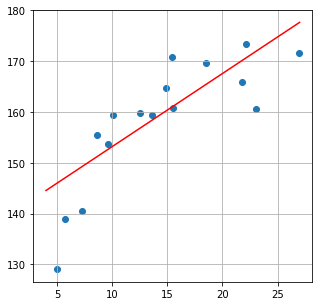

In [52]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
plt.figure(figsize=(5,5))
xx = np.arange(data_df['age(X)'].min() -1, data_df['age(X)'].max() +1)
yy = reg.predict(xx.reshape(len(xx),1))

#y = 0.697056X + 36.06 시각화
plt.plot(xx,yy,color='red')
plt.scatter(data_df['age(X)'],data_df['height(T)'])
plt.grid()
plt.show()

# < 스탯츠모델에서 단순선형회귀 수행>

In [21]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv("C:/Users/Administrator/Desktop/회귀분석/data/beer.csv")

#독립변수, 종속변수 데이터셋 준비
import numpy as np

X = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#스탯츠모델은 상수를 추가함
X_train = sm.add_constant(X_train)

In [24]:
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [62]:
X_test

array([[35.5],
       [20.5],
       [26.2],
       [20.5],
       [ 8.4],
       [10.2]])

In [26]:
X_test = sm.add_constant(X_test)

In [64]:
X_test

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

In [27]:
# 스탯츠모델
#기존fit(X_train,y_trian)과 순서반대 sm.OLS(y_train,X_train)
lr = sm.OLS(y_train,X_train)

reg = lr.fit()

In [28]:
# 성능 평가
y_pred = reg.predict(X_test)

#스텟츠모델은 summary를 제공
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           9.50e-05
Time:                        19:28:07   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 보스턴 집값 선형 회귀(statsmodel)

### 데이터 수집

In [69]:
from sklearn.datasets import load_boston

boston = load_boston()

### 데이터 탐색

In [70]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [71]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [72]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [73]:
import pandas as pd

df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [74]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [80]:
X = pd.DataFrame(df['RM'])
y = boston.target

### 학습용/ 검증용 데이터 분리

In [81]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =12)


In [82]:
from sklearn.linear_model import LinearRegression

### 모델 구축

In [84]:
lr = LinearRegression()

reg= lr.fit(X_train, y_train)

y_pred = reg.predict(X_test)

### 모델 평가

In [92]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test,y_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

r2_score(y_test, y_pred)

45.94090641477869
6.777972146208532


0.4763236202580293

In [94]:
reg.coef_, reg.intercept_

(array([9.39825343]), -36.61323270318843)

### 시각화

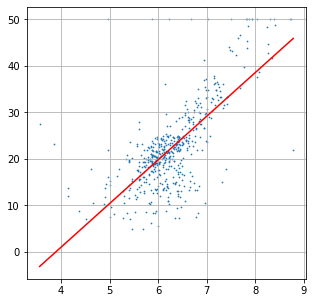

In [105]:
#방의 개수와 주택 중간 가격 관계 시각화
# y = 9.4x -36.62

plt.figure(figsize=(5,5))
plt.scatter(X, y, s=0.5)

xx = np.linspace(X.min(), X.max())
yy = reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy,color='red')
plt.grid()
plt.show()

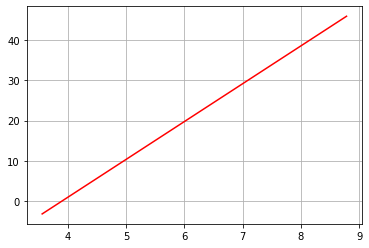

In [104]:
xx = np.linspace(X.min(), X.max())
yy = reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy,color='red')
plt.grid()
plt.show()